In [1]:
from sklearn.tree import DecisionTreeClassifier

In [2]:
dtc = DecisionTreeClassifier()

In [3]:
dtc

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("gapminder.csv")

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder()

In [9]:
df["Region"] = le.fit_transform(df["Region"])

In [11]:
X = df.drop(["Region"],1)
y = df["Region"]

In [13]:
dtc

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [16]:
import numpy as np
params = {"criterion":["gini", "entropy"],
        "max_depth":np.arange(1,20), 
         "min_samples_split":np.arange(0.01,0.13, 0.01)}

In [18]:
from  sklearn.model_selection import GridSearchCV

In [19]:
dtc_cv = GridSearchCV(dtc, param_grid=params, cv = 10)

In [20]:
dtc_cv.fit(X,y)

/Users/Arunabh/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]), 'min_samples_split': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [21]:
dtc_cv.best_params_

{'criterion': 'gini', 'max_depth': 16, 'min_samples_split': 0.01}

In [22]:
dtc_cv.best_score_

0.7122302158273381

In [23]:
dtc_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=16,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=0.01,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
ok = pd.Series(dtc_cv.best_estimator_.feature_importances_, index = list(X))

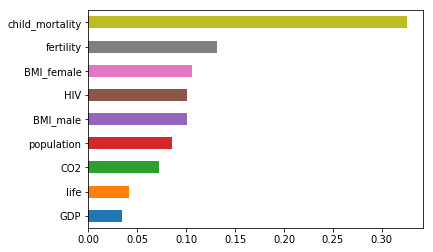

In [33]:
ok.sort_values(ascending=True).plot(kind = "barh")